In [61]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [26]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
seed = 1234
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')
# fetch dataset 
DB = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = DB.data.features 
y = DB.data.targets 






In [27]:
from sklearn.preprocessing import LabelEncoder

X.fillna('Unknown', inplace=True)

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
        print(X[column], ": ", list(label_encoder.classes_)) 

print(X.info())


0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: int64 :  ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Unknown']
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 101766, dtype: int64 :  ['Female', 'Male', 'Unknown/Invalid']
0         0
1         1
2         2
3         3
4         4
         ..
101761    7
101762    8
101763    7
101764    8
101765    7
Name: age, Length: 101766, dtype: int64 :  ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: weight, Length: 101766, dtype: int64 :  ['>200', 'Unknown', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '

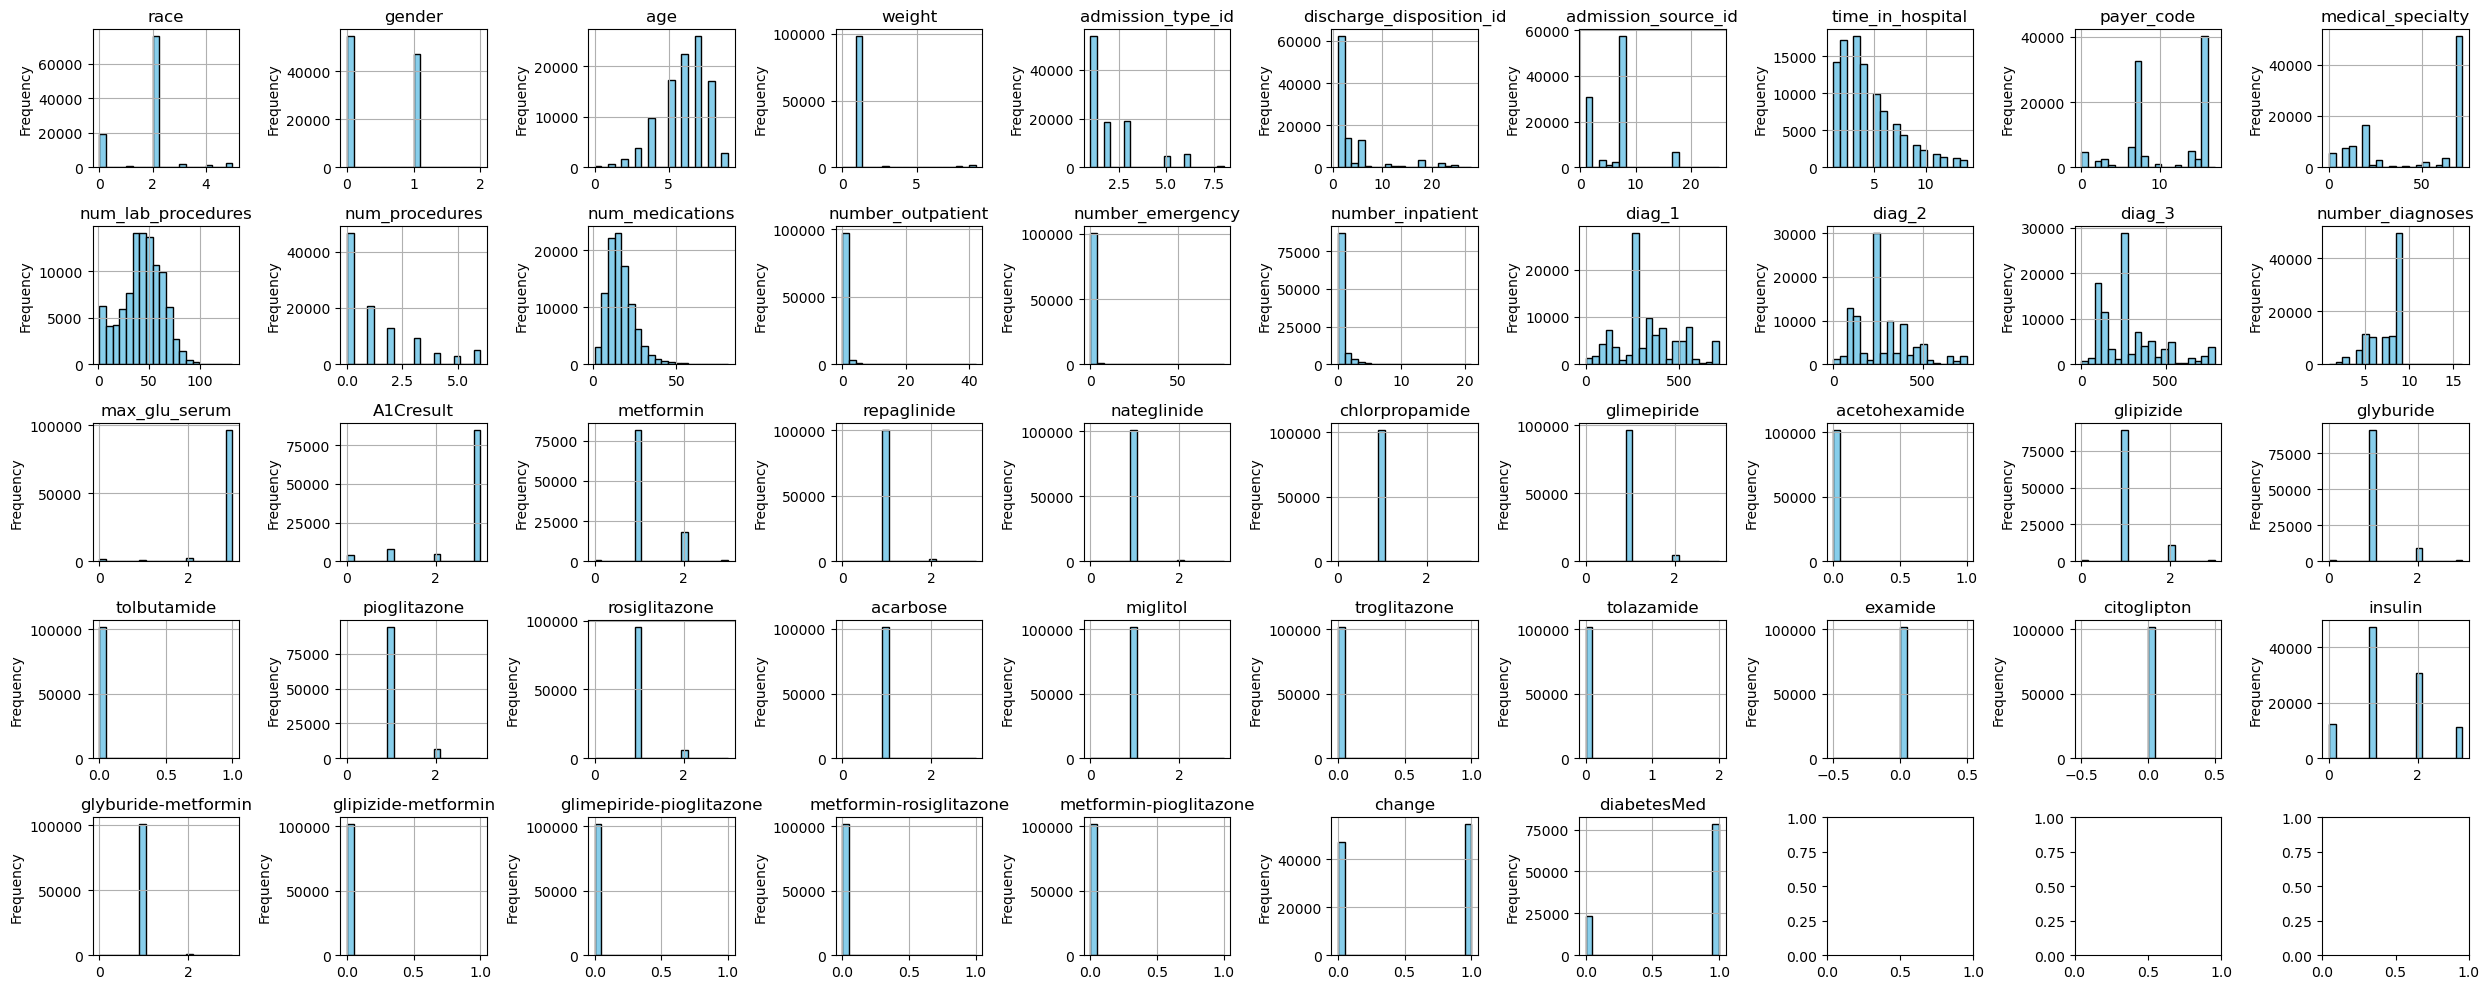

In [28]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 5, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 10))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [32]:
features_to_remove = ['weight', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 
                      'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide']

## LATER REMOVED 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone' AS WELL
print(X.columns)
X = X.drop(columns=features_to_remove)

more_to_remove = ['glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']
X = X.drop(columns=more_to_remove)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'metformin', 'insulin', 'change',
       'diabetesMed'],
      dtype='object')


KeyError: "['weight', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide'] not found in axis"

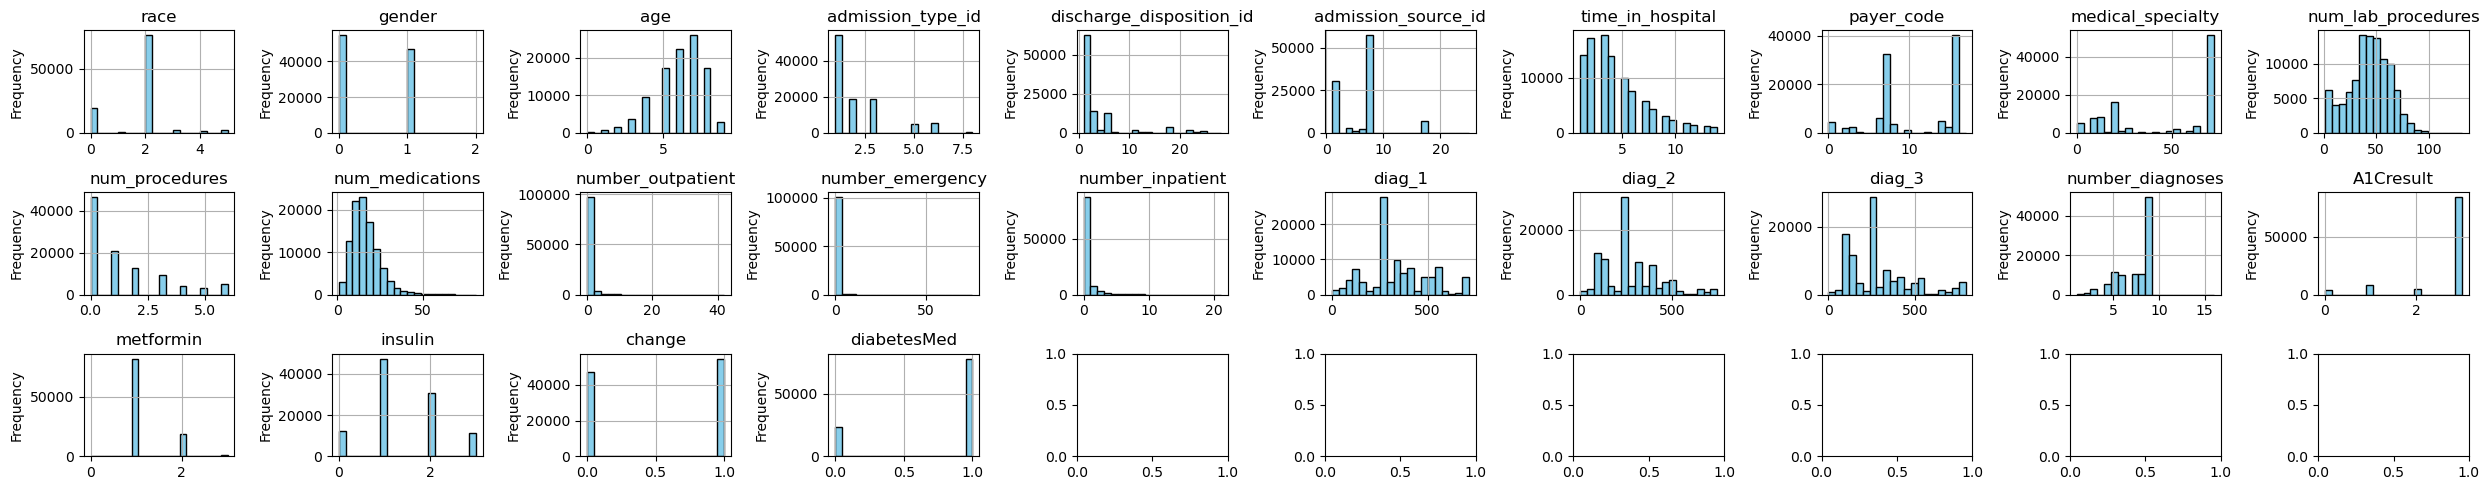

In [33]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 3, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [34]:
min_X = np.min(X, axis=0)
max_X = np.max(X, axis=0)
variance_X = np.var(X, axis=0)
mean_X = np.mean(X, axis=0)

for i in range(X.shape[1]):
    print(f"Feature {i+1} - Min: {min_X[i]}, Max: {max_X[i]}, Variance: {variance_X[i]}, Mean: {mean_X[i]}")

Feature 1 - Min: 0, Max: 5, Variance: 0.9701936780539279, Mean: 1.732788947192579
Feature 2 - Min: 0, Max: 2, Variance: 0.2486484494796395, Mean: 0.46244325216673543
Feature 3 - Min: 0, Max: 9, Variance: 2.5410780935801163, Mean: 6.096702238468644
Feature 4 - Min: 1, Max: 8, Variance: 2.0891688109184643, Mean: 2.024006053102215
Feature 5 - Min: 1, Max: 28, Variance: 27.879873842345724, Mean: 3.7156417664052825
Feature 6 - Min: 1, Max: 25, Variance: 16.516590726308934, Mean: 5.754436648782501
Feature 7 - Min: 1, Max: 14, Variance: 8.910780821080085, Mean: 4.395986871843248
Feature 8 - Min: 0, Max: 17, Variance: 26.666750245513086, Mean: 10.611667944107069
Feature 9 - Min: 0, Max: 72, Variance: 774.8384969228265, Mean: 46.054792366802275
Feature 10 - Min: 1, Max: 132, Variance: 387.07672627734803, Mean: 43.09564098028811
Feature 11 - Min: 0, Max: 6, Variance: 2.909748857192579, Mean: 1.339730361810428
Feature 12 - Min: 1, Max: 81, Variance: 66.05668337433822, Mean: 16.021844230882614
Fea

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)

max_depth = 6


dectree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=seed)
dectree.fit(Xtr, ytr)

ytr_pred = dectree.predict(Xtr)
yte_pred = dectree.predict(Xte)

error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
print(f"Training Error Rate: ", error_rate_train)

error_rate_validation = 1 - accuracy_score(yte, yte_pred)
print(f"Validation Error Rate: ", error_rate_validation)

Training Error Rate:  0.4211664128138358
Validation Error Rate:  0.41864007074776455


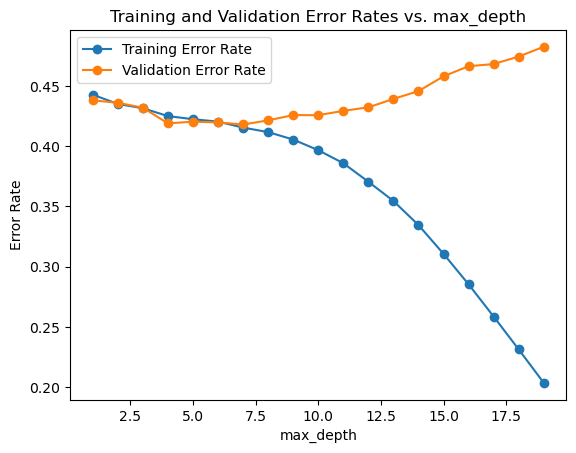

In [36]:
max_depths = range(1,20)
error_rates_tr = []
error_rates_te= []

for d in max_depths:
    dectree = DecisionTreeClassifier(max_depth=d, criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(max_depths, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(max_depths, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. max_depth')
plt.legend()
plt.show()

In [37]:
for i, j in enumerate(error_rates_te):
    print("max depth: ", i, " error rate: ", j)

print(min(error_rates_te))

# Best Max Depth  == 6

max depth:  0  error rate:  0.4379974452196128
max depth:  1  error rate:  0.4359830991451312
max depth:  2  error rate:  0.4318561462120468
max depth:  3  error rate:  0.41888572270806723
max depth:  4  error rate:  0.42031050407782256
max depth:  5  error rate:  0.4196718089810356
max depth:  6  error rate:  0.41795224525891717
max depth:  7  error rate:  0.4213913727031542
max depth:  8  error rate:  0.42576397759654117
max depth:  9  error rate:  0.42566571681242016
max depth:  10  error rate:  0.4293013658248993
max depth:  11  error rate:  0.4322000589564705
max depth:  12  error rate:  0.43917657462906556
max depth:  13  error rate:  0.44566178638105536
max depth:  14  error rate:  0.45794438439618745
max depth:  15  error rate:  0.46634568143853783
max depth:  16  error rate:  0.46811437555271695
max depth:  17  error rate:  0.47435393534440407
max depth:  18  error rate:  0.4824604500343913
0.41795224525891717


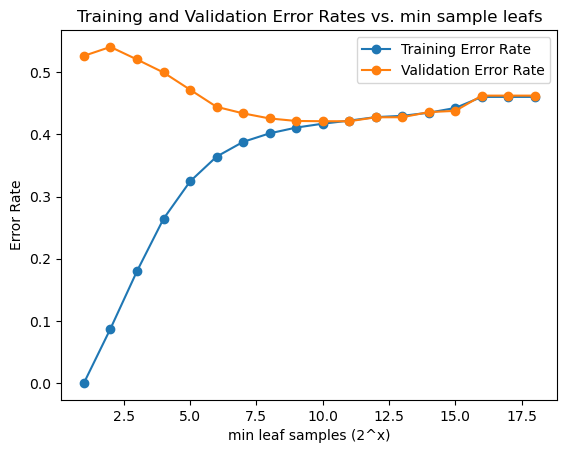

In [38]:
min_samples_leafs = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17]
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
error_rates_tr = []
error_rates_te= []

for m in min_samples_leafs:
    dectree = DecisionTreeClassifier(max_depth=100, min_samples_leaf = m ,criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(min_samples, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(min_samples, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('min leaf samples (2^x)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. min sample leafs')
plt.legend()
plt.show()


In [39]:
for i, j in enumerate(error_rates_te):
    print("min samples: 2^", i, " error rate: ", j)

print(min(error_rates_te))

# best Min Leaf Samples == 2^10

min samples: 2^ 0  error rate:  0.526579542104746
min samples: 2^ 1  error rate:  0.5409256165864204
min samples: 2^ 2  error rate:  0.5206838950574826
min samples: 2^ 3  error rate:  0.4997543480396973
min samples: 2^ 4  error rate:  0.4720939373096197
min samples: 2^ 5  error rate:  0.4444826569716026
min samples: 2^ 6  error rate:  0.4339687530706495
min samples: 2^ 7  error rate:  0.42576397759654117
min samples: 2^ 8  error rate:  0.4217352854475779
min samples: 2^ 9  error rate:  0.42129311191903307
min samples: 2^ 10  error rate:  0.4212439815269726
min samples: 2^ 11  error rate:  0.4276309324948413
min samples: 2^ 12  error rate:  0.4277291932789624
min samples: 2^ 13  error rate:  0.4359830991451312
min samples: 2^ 14  error rate:  0.4379974452196128
min samples: 2^ 15  error rate:  0.46251351085781667
min samples: 2^ 16  error rate:  0.46251351085781667
min samples: 2^ 17  error rate:  0.46251351085781667
0.4212439815269726


In [40]:
label_encoder = LabelEncoder()

for column in y.columns:
    if y[column].dtype == 'object':
        y[column] = label_encoder.fit_transform(y[column])
        print(y[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in ytr.columns:
    if ytr[column].dtype == 'object':
        ytr[column] = label_encoder.fit_transform(ytr[column])
        print(ytr[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in yte.columns:
    if yte[column].dtype == 'object':
        yte[column] = label_encoder.fit_transform(yte[column])
        print(yte[column], ": ", list(label_encoder.classes_)) 

print(ytr.info())


0         2
1         1
2         2
3         2
4         2
         ..
101761    1
101762    2
101763    2
101764    2
101765    2
Name: readmitted, Length: 101766, dtype: int64 :  ['<30', '>30', 'NO']
50908    1
68819    1
57012    2
32605    2
59700    2
        ..
89460    2
60620    2
34086    2
58067    1
92975    1
Name: readmitted, Length: 81412, dtype: int64 :  ['<30', '>30', 'NO']
28004    2
81934    2
12445    2
42240    1
35502    2
        ..
3916     1
44239    1
41031    2
31942    1
2724     2
Name: readmitted, Length: 20354, dtype: int64 :  ['<30', '>30', 'NO']
<class 'pandas.core.frame.DataFrame'>
Index: 81412 entries, 50908 to 92975
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   readmitted  81412 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB
None


In [43]:
m,n = Xtr.shape
classifiers = []
numLearners = 100
msl = 2
md = 15

for b in range(numLearners):
    ind = (m * np.random.rand(m)).astype(int)
    Xb, Yb = Xtr.iloc[ind, :], ytr.iloc[ind]
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, criterion='gini', random_state = seed)
    tree.fit(Xb, Yb)
    classifiers.append(tree)

In [44]:
from sklearn.ensemble import RandomForestClassifier

0.4712095902525302
0.4368183158101602
0.4271887589662966
0.42330745799351477
0.42566571681242016
0.42655006386950967
0.4258131079886017
0.4254200648521175


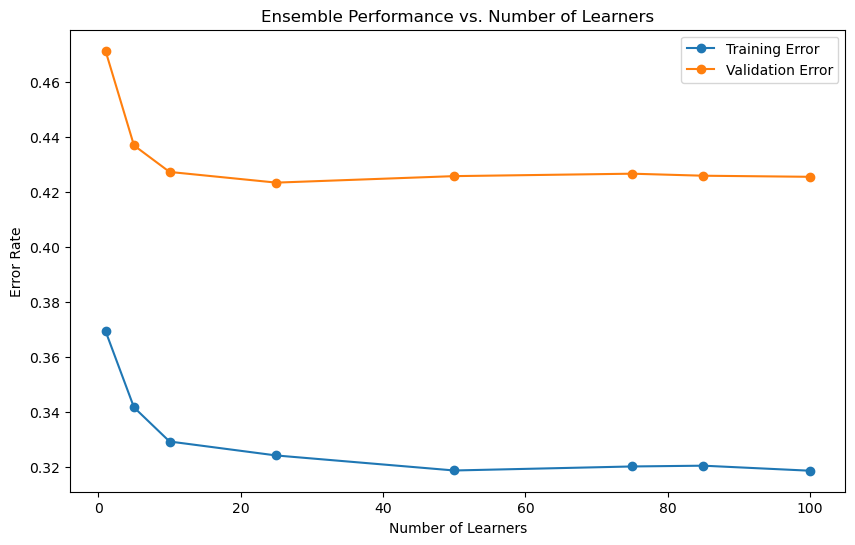

In [46]:
ensemble_num = [1, 5, 10, 25, 50, 75, 85, 100]

train_errors = []
val_errors = []

def calculate_mode(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    mode_index = np.argmax(counts)
    mode = unique_values[mode_index]
    return mode

# Iterate over the specified number of learners
for num_learners in ensemble_num:
    # Use the first num_learners models from the ensemble
    ensemble_subset = classifiers[:num_learners]

    
    
    mTest = Xtr.shape[0]
    predict = np.zeros((mTest, num_learners))
    
    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xtr)
    #print(predict)
    predict1 = np.mean(predict, axis=1)
    predict1 = np.round(predict1).astype(int)
    #print("predict1: ", predict1)
    #predict1 = [-1 if num < 0 else 1 for num in predict1]
    
    tr_error = 1 - accuracy_score(ytr, predict1)

    train_errors.append(tr_error)


    
    mTest = Xte.shape[0]
    predict = np.zeros((mTest, num_learners))

    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xte)

    predict2 = np.mean(predict, axis=1)
    predict2 = np.round(predict2).astype(int)
    #predict2 = [-1 if num < 0 else 1 for num in predict2]

    te_error = 1 - accuracy_score(yte, predict2)
    print(te_error)

    val_errors.append(te_error)

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(ensemble_num, train_errors, label='Training Error', marker = 'o')
plt.plot(ensemble_num, val_errors, label='Validation Error',  marker = 'o')
plt.xlabel('Number of Learners')
plt.ylabel('Error Rate')
plt.title('Ensemble Performance vs. Number of Learners')
plt.legend()
plt.show()

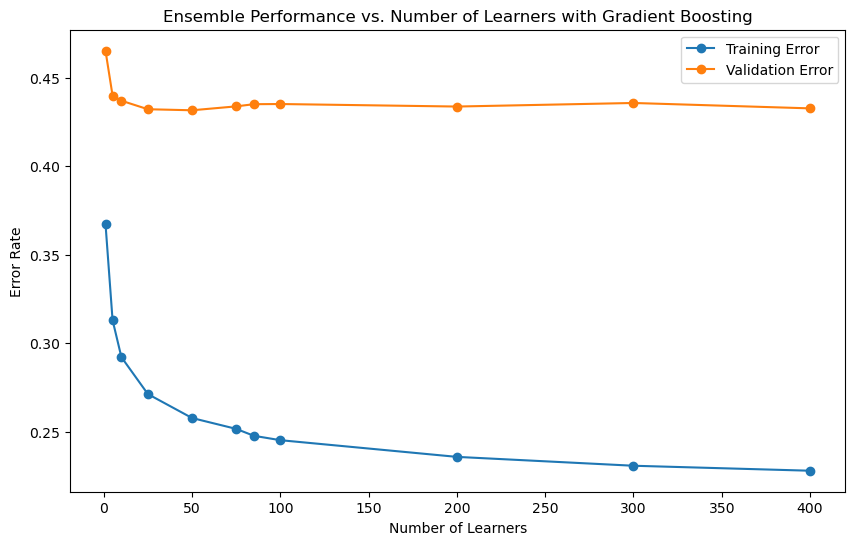

In [110]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming Xtr, Xte, ytr, yte are your training and testing sets

# m, n = Xtr.shape
# classifiers = []
# numLearners = 400
# msl = 2
# md = 15
# seed = 1234

# # Generate a random forest
# for b in range(numLearners):
#     ind = (m * np.random.rand(m)).astype(int)
#     Xb, Yb = Xtr.iloc[ind, :], ytr.iloc[ind]
#     tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, criterion='gini', random_state=seed)
#     tree.fit(Xb, Yb)
#     classifiers.append(tree)

# ensemble_num = [1, 5, 10, 25, 50, 75, 85, 100, 200, 300, 400]

# train_errors = []
# val_errors = []

# # Iterate over the specified number of learners
# for num_learners in ensemble_num:
#     # Use the first num_learners models from the ensemble
#     ensemble_subset = classifiers[:num_learners]

#     mTest = Xtr.shape[0]
#     predict = np.zeros((mTest, num_learners))

#     for i in range(num_learners):
#         predict[:, i] = ensemble_subset[i].predict(Xtr)
    
#     # Apply Gradient Boosting to the ensemble predictions
#     gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed)
#     gb.fit(predict, ytr)

#     # Make predictions on the training set
#     predict1 = gb.predict(predict)
    
#     tr_error = 1 - accuracy_score(ytr, predict1)
#     train_errors.append(tr_error)

#     mTest = Xte.shape[0]
#     predict = np.zeros((mTest, num_learners))

#     for i in range(num_learners):
#         predict[:, i] = ensemble_subset[i].predict(Xte)

#     # Make predictions on the testing set
#     predict2 = gb.predict(predict)

#     te_error = 1 - accuracy_score(yte, predict2)
#     val_errors.append(te_error)

# # Plot the training and validation errors
# plt.figure(figsize=(10, 6))
# plt.plot(ensemble_num, train_errors, label='Training Error', marker='o')
# plt.plot(ensemble_num, val_errors, label='Validation Error', marker='o')
# plt.xlabel('Number of Learners')
# plt.ylabel('Error Rate')
# plt.title('Ensemble Performance vs. Number of Learners with Gradient Boosting')
# plt.legend()
# plt.show()


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

1
1   0.4192787658445515
2
2   0.41348137958140907
3
3   0.40891225311977986
4
4   0.40547312567554294
5
5   0.4056205168517245
6
6   0.40591529920408764
7
7   0.406504863908814
8
8   0.4083226884150536
9
9   0.40994399135305104


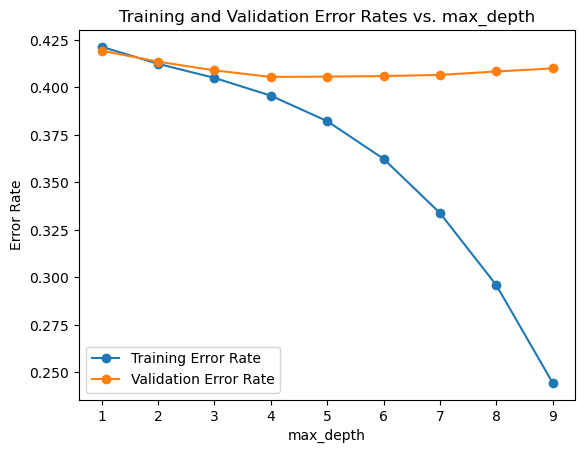

In [49]:


max_depths = range(1,10)
error_rates_tr = []
error_rates_te= []

for d in max_depths:
    print(d)
    gb = GradientBoostingClassifier(max_depth=d,random_state=seed)
    gb.fit(Xtr, ytr)
    
    ytr_pred = gb.predict(Xtr)
    yte_pred = gb.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)
    print(d, " ", error_rate_validation)

# Plot the results
plt.plot(max_depths, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(max_depths, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. max_depth')
plt.legend()
plt.show()

In [ ]:
# best max depth is 4

5
5   0.40871573155153773
10
10   0.4069470374373587
15
15   0.4070944286135403
20
20   0.40645573351675346
24
24   0.40547312567554294


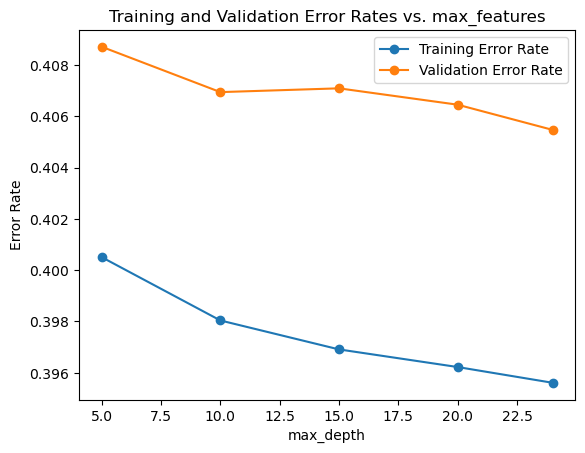

In [58]:
max_features = [5, 10, 15, 20, 24]
error_rates_tr = []
error_rates_te= []

for d in max_features:
    print(d)
    gb = GradientBoostingClassifier(max_depth=4,random_state=seed, max_features=d)
    gb.fit(Xtr, ytr)
    
    ytr_pred = gb.predict(Xtr)
    yte_pred = gb.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)
    print(d, " ", error_rate_validation)

# Plot the results
plt.plot(max_features, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(max_features, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. max_features')
plt.legend()
plt.show()

1
1   0.40547312567554294
2
2   0.4067505158691166
4
4   0.4066522550849956
8
8   0.4072909501817824
16
16   0.4063083423405719
32
32   0.40714355900560084
64
64   0.40670138547705614
128
128   0.40792964527856934
256
256   0.40689790704529827
512
512   0.4068487766532377
1024
1024   0.40611182077232977
2048
2048   0.40871573155153773
4096
4096   0.4099931217451115
8192
8192   0.41073007762601943
16384
16384   0.4278274540630834
32768
32768   0.46251351085781667
65536
65536   0.46251351085781667
131072
131072   0.46251351085781667


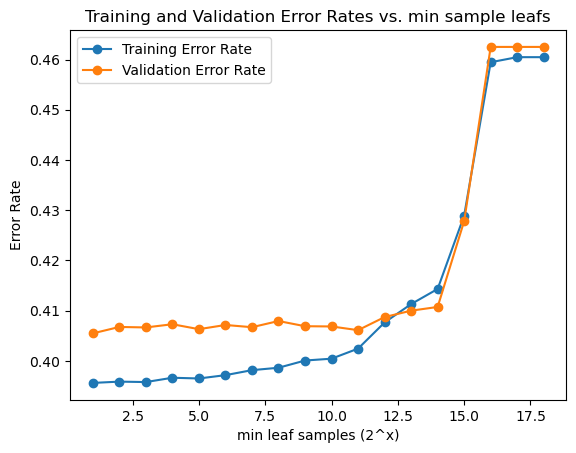

In [60]:
min_samples_leafs = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17]
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
error_rates_tr = []
error_rates_te= []

for m in min_samples_leafs:
    print(m)
    gb = GradientBoostingClassifier(max_depth=4,random_state=seed, min_samples_leaf=m)
    gb.fit(Xtr, ytr)
    
    ytr_pred = gb.predict(Xtr)
    yte_pred = gb.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)
    print(m, " ", error_rate_validation)

# Plot the results
plt.plot(min_samples, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(min_samples, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('min leaf samples (2^x)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. min sample leafs')
plt.legend()
plt.show()

In [62]:
from sklearn.ensemble import StackingClassifier

In [64]:
### !!! TRY STACKING NEXT ???? !!!!

# Base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 2**10, random_state=seed)),
    ('gradient_boosting', GradientBoostingClassifier(max_depth = 4, random_state=seed))
]

# Meta-model
meta_model = RandomForestClassifier(random_state=seed)

# Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Training
stacking_classifier.fit(Xtr, ytr)

# Predictions on the test set
y_pred = stacking_classifier.predict(Xte)

# Evaluate the performance
accuracy = accuracy_score(yte, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy} ({1-accuracy})")

Stacking Classifier Accuracy: 0.5523729979365235 (0.4476270020634765)


In [69]:
from sklearn.cluster import FeatureAgglomeration

trying  2  clusters
Accuracy on the test set with n_clusters=2: 0.536896924437457 (0.46310307556254304)
trying  5  clusters
Accuracy on the test set with n_clusters=5: 0.5470669155939865 (0.45293308440601354)
trying  10  clusters
Accuracy on the test set with n_clusters=10: 0.5640169008548688 (0.4359830991451312)
trying  15  clusters
Accuracy on the test set with n_clusters=15: 0.5820477547410828 (0.41795224525891717)
trying  20  clusters
Accuracy on the test set with n_clusters=20: 0.5915299204087648 (0.40847007959123516)
trying  24  clusters
Accuracy on the test set with n_clusters=24: 0.5945760047165176 (0.4054239952834824)


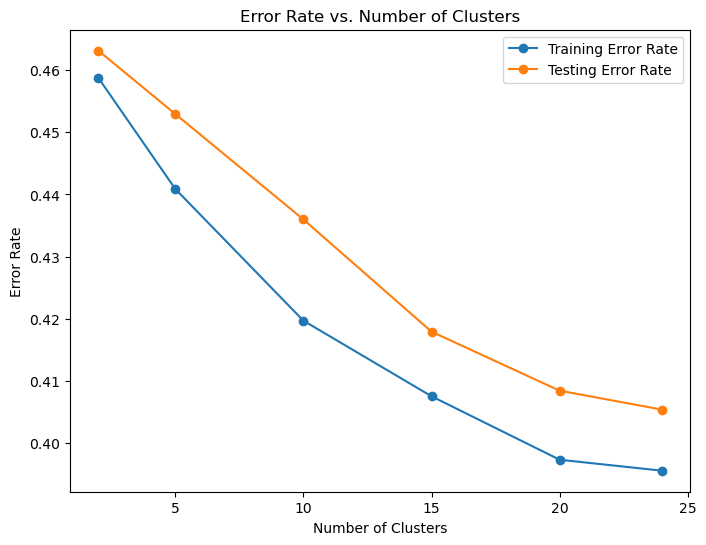

In [79]:
# Values of n_clusters to try
n_clusters_values = [2, 5, 10, 15, 20, 24]

# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Loop through different values of n_clusters
for n_clusters in n_clusters_values:
    print('trying ', n_clusters, ' clusters')
    # Feature Agglomeration
    agglo = FeatureAgglomeration(n_clusters=n_clusters)
    Xtr_transformed = agglo.fit_transform(Xtr)
    Xte_transformed = agglo.transform(Xte)

    # Train a model (for example, a RandomForestClassifier) on the transformed data
    clf = GradientBoostingClassifier(max_depth = 4, random_state=seed)
    clf.fit(Xtr_transformed, ytr)

    # Make predictions on the training set
    y_train_pred = clf.predict(Xtr_transformed)
    train_accuracy = accuracy_score(ytr, y_train_pred)
    train_accuracies.append(1 - train_accuracy)

    # Make predictions on the test set
    y_test_pred = clf.predict(Xte_transformed)
    test_accuracy = accuracy_score(yte, y_test_pred)
    test_accuracies.append(1 - test_accuracy)

    print(f"Accuracy on the test set with n_clusters={n_clusters}: {test_accuracy} ({1 - test_accuracy})")

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_values, train_accuracies, label='Training Error Rate', marker='o')
plt.plot(n_clusters_values, test_accuracies, label='Testing Error Rate', marker='o')
plt.title('Error Rate vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

100
100 :  0.40547312567554294
125
125 :  0.4049818217549376
150
150 :  0.404736169794635
200
200 :  0.4046379090105139
225
225 :  0.40444138744227176
250
250 :  0.40503095214699814
350
350 :  0.40434312665815075
500
500 :  0.40355704038518225


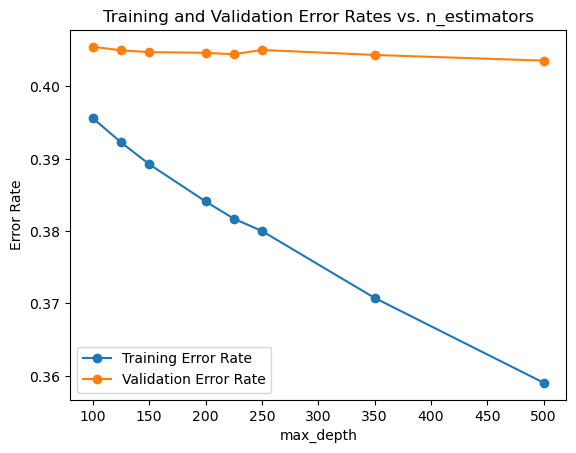

In [81]:
estimators = [100, 125, 150, 200, 225, 250, 350, 500]
error_rates_tr = []
error_rates_te= []

for d in estimators:
    print(d)
    gb = GradientBoostingClassifier(max_depth=4,random_state=seed, n_estimators = d)
    gb.fit(Xtr, ytr)
    
    ytr_pred = gb.predict(Xtr)
    yte_pred = gb.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)
    print(d, ": ", error_rate_validation)

# Plot the results
plt.plot(estimators, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(estimators, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. n_estimators')
plt.legend()
plt.show()